# <center>----- Network Algorithms -----</center>

# Graph and DiGraph classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

INF = 99999

class Graph:
    
    def __init__(self, edges):
        self.edges = {}
        self.nodes = {}
        for e in edges:
            self.add_edge(e)
    
    def add_node(self, n):
        if n not in self.nodes:
            self.nodes[n]=n
            
    def add_edge(self, e):
        w = 1 if len(e) == 2 else e[2]
        if (e[0],e[1],w) not in self.edges and (e[1],e[0],w) not in self.edges:
            self.add_node(e[0])
            self.add_node(e[1])
            self.edges[(e[0],e[1],w)] = (e[0],e[1],w)
            
    def get_nodes(self):
        return self.nodes.copy()
    
    def get_edges(self):
        return self.edges.copy()
            
    def get_neighbours(self, node):
        neighbours = []
        for edge in self.edges:
            if node == edge[0] and edge[1] not in neighbours:
                neighbours.append(edge[1])
            elif node == edge[1] and edge[0] not in neighbours:
                neighbours.append(edge[0])
        return neighbours
            
    def get_W_matrix(self):
        W = np.zeros((len(self.nodes), len(self.nodes)), dtype=int)
        for e in self.edges:
            W[e[0],e[1]] = e[2]
            W[e[1],e[0]] = e[2]
        return W                
    
class DiGraph:
    
    def __init__(self, edges):
        self.edges = {}
        self.nodes = {}
        for e in edges:
            self.add_edge(e)
    
    def add_node(self, n):
        if n not in self.nodes:
            self.nodes[n] = n
            
    def add_edge(self, e):
        w = 1 if len(e) == 2 else e[2]
        if (e[0],e[1],w) not in self.edges:
            self.add_node(e[0])
            self.add_node(e[1])
            self.edges[(e[0],e[1],w)] = (e[0],e[1],w)
            
    def get_nodes(self):
        return self.nodes.copy()
    
    def get_edges(self):
        return self.edges.copy()
            
    def get_neighbours(self, node):
        neighbours = []
        for edge in self.edges:
            if node == edge[0] and edge[1] not in neighbours:
                neighbours.append(edge[1])
        return neighbours
            
    def get_W_matrix(self):
        W = {}
        for e in self.edges:
            W[e[0],e[1]] = e[2]
        return W

# Cable Networks:

## 1. The routing problem: the minimum cost path problem

- <b>Not adaptative routing:</b> no weighted edges, routing tables are used.
- <b>Adaptative routing:</b> weighted edges (proportional to the traffic), each router creates its own routing table.
- <b>Routing with faults:</b> weighted edges (w(e) = -log(p(e)), p(e) is the probability that the edge e does not fail).
- <b>Why does routing matters?</b> End-to-end performance, use of network resources and transision.

### 1.1. Breadth First Search (BFS)

In [2]:
def bfs(G, init):
    q = [init]
    l = []
    while(len(q)):
        l.append(q[0])
        for n in G.get_neighbours(q[0]):
            if n not in l and n not in q:
                q.append(n)
        q.remove(q[0])
    return l

# Example:
G = DiGraph([(0,1), (0,2), (1,3), (1,4), (2,3), (2,6), (3,4), (3,6), (4,5), (5,6), (6,0)])
print(bfs(G, 0))

[0, 1, 2, 3, 4, 6, 5]


### 1.2 The relaxation step

In [3]:
def relax(u, v, W, D, P):
    if D[u] + W[u,v] < D[v]:
        D[v] = D[u] + W[u,v]
        P[v] = u

### 1.3 Bellman-Ford algorithm

- One-to-all
- Negative edge weights are allowed.
- Complexity: O(nm).
    - n: number of nodes
    - m: number of edges

In [4]:
def bellman_ford(G, init):
    D = dict(zip(list(G.get_nodes()),[INF]*len(G.get_nodes())))
    D[init] = 0
    P = dict(zip(list(G.get_nodes()),[-1]*len(G.get_nodes())))
    W = G.get_W_matrix()
    for i in range(1,len(G.get_nodes())-1):
        for edge in G.get_edges():
            relax(edge[0], edge[1], W, D, P)
    return D, P

# Example:
G = DiGraph([(0,1,6), (0,2,7), (1,2,8), (1,3,5), (1,4,-4), (2,3,-3), (2,4,1), (3,1,-2), (4,0,2), (4,3,7)])
D, P = bellman_ford(G,0)
print('D =', D, '\nP =', P)

D = {0: 0, 1: 2, 2: 7, 3: 4, 4: -2} 
P = {0: -1, 1: 3, 2: 0, 3: 2, 4: 1}


### 1.4 Dijkstra algorithm

- One-to-all
- Negative edge weights are NOT allowed.
- Complexity: O(n²) using queue or O(m log n) using heap.
    - n: number of nodes
    - m: number of edges

In [5]:
def dijkstra(G, init):
    D = dict(zip(list(G.get_nodes()),[INF]*len(G.get_nodes())))
    D[init] = 0
    P = dict(zip(list(G.get_nodes()),[-1]*len(G.get_nodes())))
    S = []
    Q = list(G.get_nodes())
    Q.sort(key = lambda x: D[x])
    W = G.get_W_matrix()
    while(len(Q) != 0): 
        u = Q[0]
        Q.remove(u)
        S.append(u)
        for v in G.get_neighbours(u):
            relax(u,v,W,D,P)
            Q.sort(key = lambda x: D[x])
    return D, P

# Example:
G = DiGraph([(0,1,6), (0,2,7), (1,2,8), (1,3,9), (1,4,1), (2,3,8), (2,4,1), (3,1,2), (4,0,2), (4,3,7)])
D, P = dijkstra(G,0)
print('D =', D,'\nP =', P)

D = {0: 0, 1: 6, 2: 7, 3: 14, 4: 7} 
P = {0: -1, 1: 0, 2: 0, 3: 4, 4: 1}


### 1.5 Floyd-Warshall algorithm

- All-to-all
- Negative edge weights are allowed.
- Complexity: O(n³)
    - n: number of nodes

In [6]:
def floyd_warshall(G):
    dist = {}
    for u in G.get_nodes():
        for v in G.get_nodes():
            if u == v:
                dist[u,v] = 0
            else:
                dist[u,v] = INF
    for u, v, w in G.get_edges():
        dist[u, v] = w
    for k in G.get_nodes():
        for i in G.get_nodes():
            for j in G.get_nodes():
                dist[i,j] = min(dist[i,j], dist[i,k]+dist[k,j])
    return dist

# Example:
G = DiGraph([(0,1,6), (0,2,7), (1,2,8), (1,3,9), (1,4,1), (2,3,8), (2,4,1), (3,1,2), (4,0,2), (4,3,7)])
dist = floyd_warshall(G)
print(dist)

{(0, 0): 0, (0, 1): 6, (0, 2): 7, (0, 3): 14, (0, 4): 7, (1, 0): 3, (1, 1): 0, (1, 2): 8, (1, 3): 8, (1, 4): 1, (2, 0): 3, (2, 1): 9, (2, 2): 0, (2, 3): 8, (2, 4): 1, (3, 0): 5, (3, 1): 2, (3, 2): 10, (3, 3): 0, (3, 4): 3, (4, 0): 2, (4, 1): 8, (4, 2): 9, (4, 3): 7, (4, 4): 0}


### 1.6 Another application: tasks with precedence constraints

In [7]:
def construct_graph(tasks):
    G = DiGraph([])
    for k,v in tasks.items():
        G.add_edge(('t0',k,v['b']))
        for c in v['c']:
            G.add_edge((c,k,v['b']))
    return G

def multiply_weights_by_minus_one(edges):
    for i in range(len(edges)):
        edges[i] = (edges[i][0], edges[i][1], -edges[i][2])
    return edges
        
def update_tasks_with_starting_time(tasks,D,P):
    for k,v in tasks.items():
        v['s'] = -D[P[k]]
    
tasks = {
    't1': {'b': 2, 'c': ['t3']},
    't2': {'b': 3, 'c': ['t3']},
    't3': {'b': 1, 'c': []},
    't4': {'b': 2, 'c': []}
}

G = construct_graph(tasks)

for k,v in tasks.items():
    print(k, ':', v)

print('\nG = ', G.get_edges(), '\n')

newG = DiGraph(multiply_weights_by_minus_one(list(G.get_edges())))

print('newG = ', newG.get_edges(), '\n')

D, P = bellman_ford(newG,'t0')

print('D =', D, '\nP =', P)

update_tasks_with_starting_time(tasks,D,P)

print('')
for k,v in tasks.items():
    print(k, ':', v)

t1 : {'b': 2, 'c': ['t3']}
t2 : {'b': 3, 'c': ['t3']}
t3 : {'b': 1, 'c': []}
t4 : {'b': 2, 'c': []}

G =  {('t0', 't1', 2): ('t0', 't1', 2), ('t3', 't1', 2): ('t3', 't1', 2), ('t0', 't2', 3): ('t0', 't2', 3), ('t3', 't2', 3): ('t3', 't2', 3), ('t0', 't3', 1): ('t0', 't3', 1), ('t0', 't4', 2): ('t0', 't4', 2)} 

newG =  {('t0', 't1', -2): ('t0', 't1', -2), ('t3', 't1', -2): ('t3', 't1', -2), ('t0', 't2', -3): ('t0', 't2', -3), ('t3', 't2', -3): ('t3', 't2', -3), ('t0', 't3', -1): ('t0', 't3', -1), ('t0', 't4', -2): ('t0', 't4', -2)} 

D = {'t0': 0, 't1': -3, 't3': -1, 't2': -4, 't4': -2} 
P = {'t0': -1, 't1': 't3', 't3': 't0', 't2': 't3', 't4': 't0'}

t1 : {'b': 2, 'c': ['t3'], 's': 1}
t2 : {'b': 3, 'c': ['t3'], 's': 1}
t3 : {'b': 1, 'c': [], 's': 0}
t4 : {'b': 2, 'c': [], 's': 0}


### 1.7. Butterfly Network

- <b>Theorem:</b> Given any routing problem on an $n$-dimensional butterfly for which at most one packet starts at each layer $0$ node and at most one packet is destined for each layer $n$ node, the greedy algorithm will route all the packets to their destinations in $O\left(\sqrt{N}\right)$ steps.

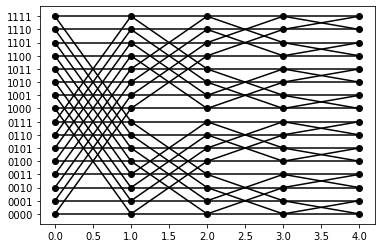

In [8]:
def butterfly_network(n):
    nodes= []
    edges = []
    for j in range(n+1):
        for i in range(2**n):
            i = bin(i)[2:].rjust(n, '0')
            nodes.append((i,j))
    for i in nodes:
        for j in nodes:
            if j[1] == i[1] + 1:
                if i[0] == j[0]:
                    edges.append((i,j))
                elif i[0][i[1]] != j[0][i[1]] and i[0][:i[1]] == j[0][:i[1]] and i[0][i[1]+1:] == j[0][i[1]+1:]:
                    edges.append((i,j))
    return DiGraph(edges)

def draw_b_network(G,n):
    edges = list(G.get_edges())
    nodes = list(G.get_nodes())
    lines = []
    for edge in edges:
        y1 = int(edge[0][0],2)
        y2 = int(edge[1][0],2)
        x1 = edge[0][1]
        x2 = edge[1][1]
        plt.plot([x1,x2],[y1,y2],c='black')
    for node in nodes:
        y = int(node[0],2)
        x = node[1]
        plt.plot([x],[y],'o',c='black')
    labels = [bin(x)[2:].rjust(n, '0') for x in range(0,2**n)]
    plt.yticks(range(0,2**n), labels)
    plt.show()
        
        
G = butterfly_network(4)
draw_b_network(G,4)

### 1.8. Benes Network

- <b>Theorem:</b> Given any one-to-one mapping of $\pi$ of $2n$ inputs to $2n$ outputs in an $n$-dim. Beneš network, there is a set of node-disjoint paths from the inputs to the outputs connecting input $i$ to output $\pi(i)$ for $1\leq i \leq 2n$.

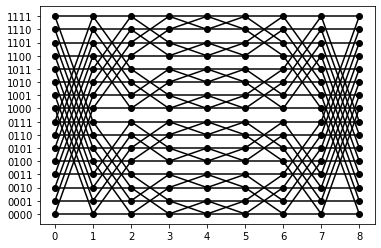

In [9]:
def benes_network(n):
    nodes= []
    edges = []
    for j in range(n+1):
        for i in range(2**n):
            i = bin(i)[2:].rjust(n, '0')
            nodes.append((i,j))
    for i in nodes:
        for j in nodes:
            if j[1] == i[1] + 1:
                i_ = (i[0],2*n-i[1])
                j_ = (j[0],2*n-j[1])
                if i[0] == j[0]:
                    edges.append((i,j))
                    edges.append((i_,j_))
                elif i[0][i[1]] != j[0][i[1]] and i[0][:i[1]] == j[0][:i[1]] and i[0][i[1]+1:] == j[0][i[1]+1:]:
                    edges.append((i,j))
                    edges.append((i_,j_))
    return DiGraph(edges)

G = benes_network(4)
draw_b_network(G,4)

## 2. The interconnection topology layout problem: the orthogonal grid drawing

### 2.1. Collinear Layout

- Height of a collinear layout: $\sum_{i=1}^{n-1}{\min(i,n-1)} = \frac{n^2}{4}$
- Width of a collinear layout: $n^2$
- Area of a collinear layout: $\frac{n^4}{4}$

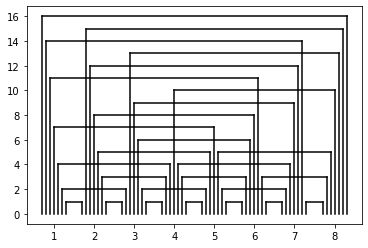

In [10]:
def draw_collinear_layout(n):
    h = 1
    s = np.arange(0.3,-0.3-0.4/(n-2),-0.6/(n-2))
    for k in range(1,n):
        for j in range(n-k):
            i = (1+j)%n
            h_ = h + (i-1)%k
            s_ = s[k-1]
            if i+k <= n:
                plt.plot([i+s_,i+s_],[0,h_], c='black')
                plt.plot([i+k-s_,i+k-s_],[0,h_], c='black')
                plt.plot([i+s_,i+k-s_],[h_,h_], c='black')
        h += min(k,n-k)
    plt.show()
    
draw_collinear_layout(8)

### 2.1. Orthogonal Layout

- Area: $\frac{n^4}{16} + o\left(n^4\right)$

# The minimum energy broadcast problem: the minimum spanning tree problem

## Finding safe arc

In [ ]:
def is_safe(T,e):
    if e[0] in T.nodes and e[1] in T.nodes:
        if e[1] in bfs(T,e[0]):
            return False
    return True

def is_a_spanning_tree(G,T):
    if not len(list(T.get_edges())): return False
    return len(bfs(T,list(T.get_nodes()))[0]) == len(G.get_nodes())

def find_safe_arc(E,T):
    e = E[0]
    E.remove(e)
    if is_safe(T, e):
        return e
    else:
        return find_safe_arc(E,T)

## Kruskal algorithm

In [ ]:
def kruskal(G):
    T = Graph([])
    E = list(G.get_edges())
    E.sort(key = lambda val: val[2])
    while(not is_a_spanning_tree(G,T)):
        e = find_safe_arc(E,T)
        T.add_edge(e)
    return T

# Example:
G = Graph([(0,1,4),(0,2,11),(1,2,11),(1,3,8),(2,4,1),(2,8,7),(3,5,7),
           (3,6,4),(3,8,2),(4,6,2),(4,8,6),(5,6,14),(5,7,9),(6,7,10)])
T = kruskal(G)
print(list(T.edges))

## Prim algorithm

In [ ]:
def prim(G):
    pass

# Example:
G = Graph([(0,1,4),(0,2,11),(1,2,11),(1,3,8),(2,4,1),(2,8,7),(3,5,7),
           (3,6,4),(3,8,2),(4,6,2),(4,8,6),(5,6,14),(5,7,9),(6,7,10)])
T = prim(G)
#print(T.edges)

## Boruvka algorithm

In [ ]:
def boruvka(G):
    pass

# Example:
G = Graph([(0,1,4),(0,2,11),(1,2,11),(1,3,8),(2,4,1),(2,8,7),(3,5,7),
           (3,6,4),(3,8,2),(4,6,2),(4,8,6),(5,6,14),(5,7,9),(6,7,10)])
T = boruvka(G)
#print(T.edges)